Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


,1,2,3
Survived,136,87,119
Died,80,97,372


Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


,female,male
Survived,233,109
Died,81,468


Percentage of Embark S that survived: 34.0 %
Percentage of Embark C that survived: 55.0 %
Percentage of Embark Q that survived: 39.0 %


,S,C,Q
Survived,217,93,30
Died,427,75,47


Number of null values in Embarked: 2
Number of null values in Age: 177


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

Logistic Regression:
 Accuracy: 0.780019010328 +/- 0.0241781317907 

K-NN:
 Accuracy: 0.809196458972 +/- 0.0313804050312 

SVM:
 Accuracy: 0.783340143003 +/- 0.0278438803052 

Naive Bayes:
 Accuracy: 0.776774486437 +/- 0.0261797682696 

Random Forest:
 Accuracy: 0.813703325389 +/- 0.032136281435


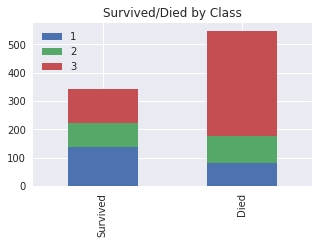

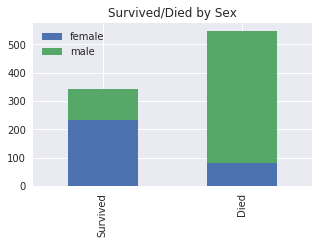

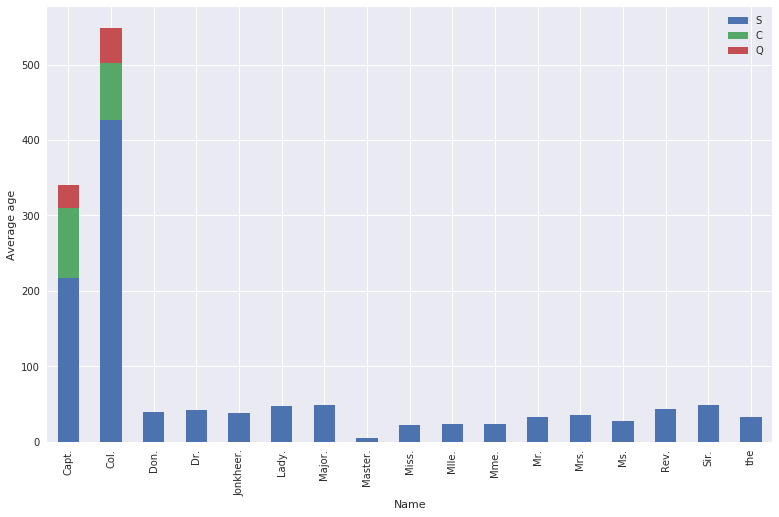

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

# Importing the libraries
# dataframes (pandas), numeric values (numpy) and visualization (matplotlib.pyplot).
import numpy as np # linear algebra
import matplotlib.pyplot as plt # object-oriented API for embedding plots
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

dataset= pd.read_csv("../input/train.csv")

# Any results you write to the current directory are saved as output.

%matplotlib inline
import seaborn
seaborn.set() 

#-------------------Survived/Died by Class -------------------------------------
survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Class")

Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived), "%")

# display table
from IPython.display import display
display(df_class)


#-------------------Survived/Died by SEX------------------------------------
   
Survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
Died = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex")


female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100
print("Percentage of female that survived:" ,round(female_survived), "%")
print("Percentage of male that survived:" ,round(male_survived), "%")

# display table
from IPython.display import display
display(df_sex) 

#-------------------- Survived/Died by Embarked ----------------------------

survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='bar',stacked=True, figsize=(5,3))

Embark_S= df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_C = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100
print("Percentage of Embark S that survived:", round(Embark_S), "%")
print("Percentage of Embark C that survived:" ,round(Embark_C), "%")
print("Percentage of Embark Q that survived:" ,round(Embark_Q), "%")

from IPython.display import display
display(df_embark)

## Data cleaning, Feature selection and Feature engineering

X = dataset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived                       # vector of labels (dependent variable)
X=X.drop(['Survived'], axis=1)       # remove the dependent variable from the dataframe X

X.head(20)


# ----------------- Encoding categorical data -------------------------

# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)


# encode "Embarked"

# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# we should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)

X.head()

#-------------- Taking care of missing data  -----------------------------

print ('Number of null values in Age:', sum(X.Age.isnull()))
 

# -------- Change Name -> Title ----------------------------
got= dataset.Name.str.split(',').str[1]
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]
# ---------------------------------------------------------- 


#------------------ Average Age per title -------------------------------------------------------------
ax = plt.subplot()
ax.set_ylabel('Average age')
X.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax)

title_mean_age=[]
title_mean_age.append(list(set(X.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age
#------------------------------------------------------------------------------------------------------


#------------------ Fill the missing Ages ---------------------------
n_traning= dataset.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(X.Age[i])==True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]
#--------------------------------------------------------------------    

X=X.drop(['Name'], axis=1)

for i in range(0, n_traning):
    if X.Age[i] > 18:
        X.Age[i]= 0
    else:
        X.Age[i]= 1

X.head()

#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#-----------------------------------K-NN --------------------------------------------------

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------------SVM -------------------------------------------------

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------Naive Bayes-------------------------------------------

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())